In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
from datetime import datetime
import warnings
from celluloid import Camera # getting the camera
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
temp_city = pd.read_csv('./input/GlobalLandTemperaturesByCity.csv')
temp_country = pd.read_csv('./input/GlobalLandTemperaturesByCountry.csv')
temp_global = pd.read_csv('./input/GlobalTemperatures.csv')
#temp_city = pd.read_csv('./input/GlobalLandTemperaturesByCity.csv')

In [7]:
def clean_data(df, temp):
    df = df[df[temp].notna()]
    df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)
    df['Year'] = df['dt'].dt.year
    df['Month'] = df['dt'].dt.month
    return df

In [8]:
temp_city

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.07,1.74,Århus,Denmark,57.05N,10.33E
1,1743-12-01,nan,nan,Århus,Denmark,57.05N,10.33E
2,1744-01-01,nan,nan,Århus,Denmark,57.05N,10.33E
3,1744-02-01,nan,nan,Århus,Denmark,57.05N,10.33E
4,1744-03-01,nan,nan,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.46,0.24,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.04,0.26,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.77,0.19,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.02,0.30,Zwolle,Netherlands,52.24N,5.26E


In [9]:
temp_global

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.03,3.57,nan,nan,nan,nan,nan,nan
1,1750-02-01,3.08,3.70,nan,nan,nan,nan,nan,nan
2,1750-03-01,5.63,3.08,nan,nan,nan,nan,nan,nan
3,1750-04-01,8.49,2.45,nan,nan,nan,nan,nan,nan
4,1750-05-01,11.57,2.07,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.76,0.07,20.70,0.11,9.00,0.17,17.59,0.06
3188,2015-09-01,13.00,0.08,18.84,0.09,7.20,0.23,17.05,0.06
3189,2015-10-01,10.80,0.10,16.45,0.06,5.23,0.12,16.29,0.06
3190,2015-11-01,7.43,0.12,12.89,0.09,2.16,0.11,15.25,0.06


In [10]:
temp_city = clean_data(temp_city, 'AverageTemperature')
temp_country = clean_data(temp_country, 'AverageTemperature')
temp_global = clean_data(temp_global, 'LandAverageTemperature')

## Is it getting warmer?

In [11]:
temp_global = temp_global.groupby(by=['Year']).mean().reset_index()
temp_global

,Year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Month
0,1750,8.72,2.64,nan,nan,nan,nan,nan,nan,6.09
1,1751,7.98,2.78,nan,nan,nan,nan,nan,nan,4.71
2,1752,5.78,2.98,nan,nan,nan,nan,nan,nan,6.83
3,1753,8.39,3.18,nan,nan,nan,nan,nan,nan,6.50
4,1754,8.47,3.49,nan,nan,nan,nan,nan,nan,6.50
...,...,...,...,...,...,...,...,...,...,...
261,2011,9.52,0.08,15.28,0.11,3.83,0.14,15.77,0.06,6.50
262,2012,9.51,0.08,15.33,0.11,3.76,0.15,15.80,0.06,6.50
263,2013,9.61,0.10,15.37,0.12,3.91,0.15,15.85,0.06,6.50
264,2014,9.57,0.09,15.31,0.11,3.88,0.14,15.91,0.06,6.50


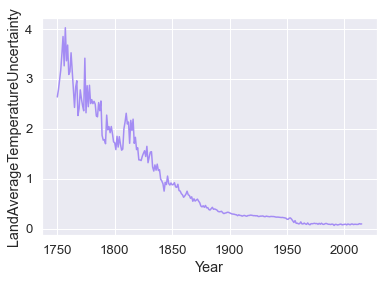

In [12]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=temp_global.Year, y = temp_global.LandAverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

In [13]:
#temp_global = temp_global[temp_global.Year>=1850]

In [14]:
fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
camera = Camera(fig)# the camera gets our figure
x = temp_global.Year
y = temp_global.LandAverageTemperature
for i in range(len(x)):
    x_t = x[:i] # current year
    y_t = y[:i] # current temp
    ax.plot(x_t, y_t, c='blue')
    camera.snap()
animation = camera.animate(blit=False, interval=20)
plt.close() #Stop the empty plot from displaying
animation.save('global_temp.gif', writer='pillow')
HTML(animation.to_html5_video())

In [15]:
#temp_country.Country.value_counts()
#temp_city.shape
#temp_city.describe()
#temp_city['temp_top'] = temp_city['AverageTemperature'] + temp_city['AverageTemperatureUncertainty']
#temp_city['temp_bottom'] = temp_city['AverageTemperature'] - temp_city['AverageTemperatureUncertainty']

## What about Greece?

In [16]:
keep_cols = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Month']
gr = temp_country[temp_country.Country == 'Greece'][keep_cols]
gr

,Year,AverageTemperature,AverageTemperatureUncertainty,Month
206656,1743,10.81,2.13,11
206661,1744,15.31,2.22,4
206662,1744,16.51,2.08,5
206663,1744,21.25,2.11,6
206664,1744,23.94,2.12,7
...,...,...,...,...
209889,2013,15.17,0.29,4
209890,2013,20.50,0.44,5
209891,2013,23.10,0.40,6
209892,2013,25.55,0.41,7


In [17]:
#gr = temp_city[temp_city['Country'] == 'Greece']

In [18]:
gr.describe()

,Year,AverageTemperature,AverageTemperatureUncertainty,Month
count,3166.00,3166.00,3166.00,3166.00
mean,1881.22,14.77,1.46,6.49
std,76.22,6.85,1.40,3.45
min,1743.00,1.22,0.09,1.00
25%,1815.00,8.46,0.38,3.00
50%,1881.00,14.37,0.89,6.00
75%,1947.00,21.23,2.15,9.00
max,2013.00,28.43,9.33,12.00


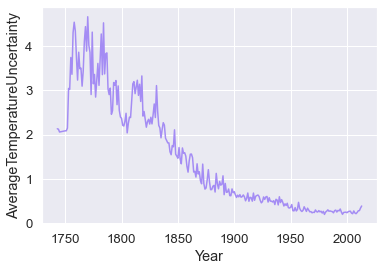

In [19]:
clrs = sns.color_palette("husl", 4)
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    sns.lineplot(x=gr.Year, y = gr.AverageTemperatureUncertainty, 
                 ci = None, color =clrs[3])

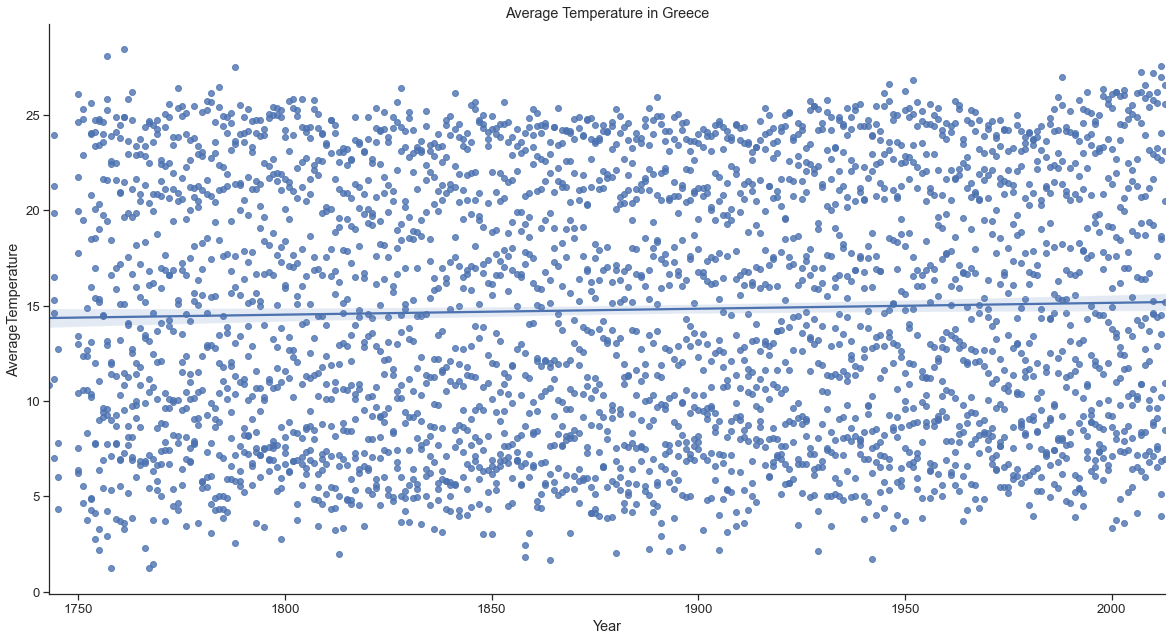

In [20]:
title = 'Average Temperature in Greece'

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()
#plt.plot(, 30) 

In [21]:
gr = gr[gr.Year>=1850]

In [22]:
def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'

In [23]:
min_year = gr['Year'].min()
max_year = gr['Year'].max()
years = range(min_year, max_year + 1)

In [24]:
gr['season'] = gr['Month'].apply(get_season)

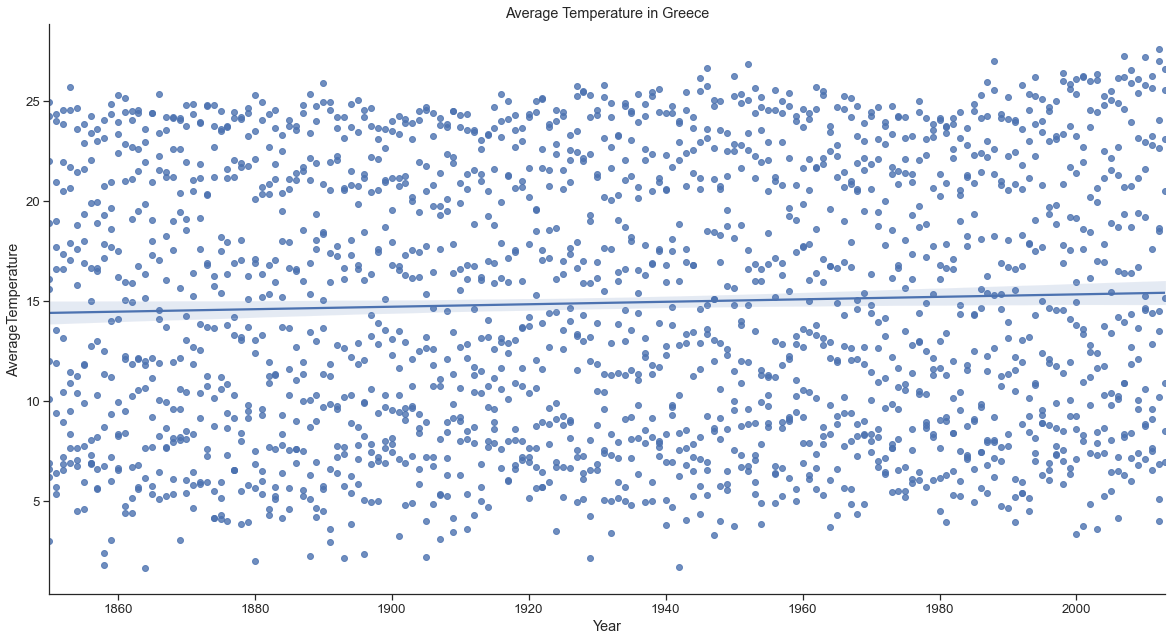

In [26]:
title = 'Average Temperature in Greece'
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
sns.regplot(data=gr, x="Year", y="AverageTemperature").set(title=title)
sns.despine()

## Are all seasons affected the same? 

In [27]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

(1850.0, 2013.0)

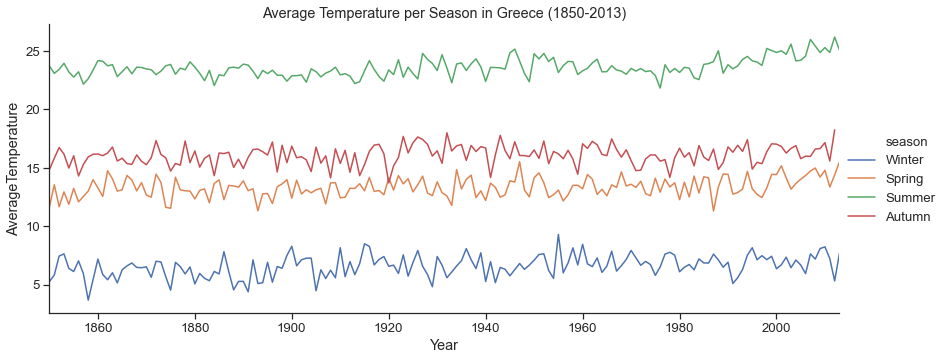

In [28]:
title = 'Average Temperature per Season in Greece (1850-2013)'
sns.relplot(data=gr, x="Year", y="AverageTemperature", hue="season", ci= None, 
            height=5, aspect=2.4, kind="line").set(title=title)
#t = plt.plot(range(i, i + 5))

#plt.legend(title='Season', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(min_year, max_year)

In [29]:
gr

,Year,AverageTemperature,AverageTemperatureUncertainty,Month,season
207930,1850,3.00,1.32,1,Winter
207931,1850,6.18,1.08,2,Winter
207932,1850,6.89,2.61,3,Spring
207933,1850,11.99,1.67,4,Spring
207934,1850,16.11,1.02,5,Spring
...,...,...,...,...,...
209889,2013,15.17,0.29,4,Spring
209890,2013,20.50,0.44,5,Spring
209891,2013,23.10,0.40,6,Summer
209892,2013,25.55,0.41,7,Summer


In [30]:
gr = gr.groupby(by=['Year', 'season']).mean().reset_index()

In [31]:
gr

,Year,season,AverageTemperature,AverageTemperatureUncertainty,Month
0,1850,Autumn,14.85,1.59,10.00
1,1850,Spring,11.66,1.77,4.00
2,1850,Summer,23.72,1.17,7.00
3,1850,Winter,5.26,1.34,5.00
4,1851,Autumn,15.82,1.65,10.00
...,...,...,...,...,...
650,2012,Summer,26.21,0.38,7.00
651,2012,Winter,5.31,0.36,5.00
652,2013,Spring,15.53,0.37,4.00
653,2013,Summer,25.08,0.42,7.00


    fig, ax = plt.subplots(figsize=(10, 6)) # let's make it bigger
    camera = Camera(fig)# the camera gets our figure

    x = gr.Year
    y = gr.AverageTemperature
    for i in range(len(x)):
        x_t = x[:i] # current year
        y_t = y[:i] # current temp
        sns.relplot(data=gr, x="Year", y="AverageTemperature", hue="season", ci= None, 
                height=5, aspect=2.4, kind="line").set(title=title)
        camera.snap()
    animation = camera.animate(blit=False, interval=20)
    plt.close() #Stop the empty plot from displaying
    animation.save('gr_temp_seasons.gif', writer='pillow')
    HTML(animation.to_html5_video())

In [33]:
gr = gr.groupby(by=['Year','season']).mean()
gr

AverageTemperature  AverageTemperatureUncertainty  Month
Year season                                                          
1850 Autumn               14.85                           1.59  10.00
     Spring               11.66                           1.77   4.00
     Summer               23.72                           1.17   7.00
     Winter                5.26                           1.34   5.00
1851 Autumn               15.82                           1.65  10.00
...                         ...                            ...    ...
2012 Summer               26.21                           0.38   7.00
     Winter                5.31                           0.36   5.00
2013 Spring               15.53                           0.37   4.00
     Summer               25.08                           0.42   7.00
     Winter                7.70                           0.38   1.50

[655 rows x 3 columns]

In [34]:
gr = gr[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [35]:
#from scipy.interpolate import make_interp_spline
#a_BSpline = make_interp_spline(list(data.index), list(data[season]))
#y_new = a_BSpline(data.index)

    plt.figure(figsize=(18,8))
    sns.set(font_scale=2)
    ax = sns.violinplot(data=data, order = seasons)
    #ax.set(xlabel='Platforms', ylabel='User Score', title='Best-Selling Consoles: Critic Scores')
    plt.show()

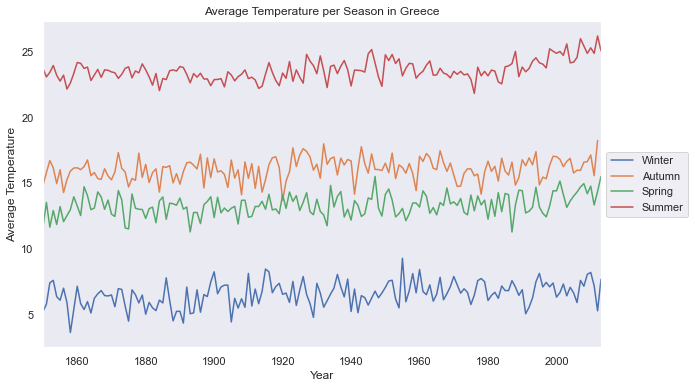

In [36]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6))

data = gr.unstack(level=1).AverageTemperature
for season in ['Winter', 'Autumn', 'Spring', 'Summer']:
    sns.lineplot(data = data[season], label=season)
plt.xlim(min_year, max_year)
ax.grid(False)
ax.set_ylabel('Average Temperature')
ax.set_xlabel('Year')
ax.set_title('Average Temperature per Season in Greece')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #sns.set(style="whitegrid")
    sns.set(style="ticks")
    f, axes = plt.subplots(4,1, figsize = (10, 10))
    data = gr_ath.unstack(level=1).AverageTemperature
    for num, season in enumerate(seasons):
        sns.lineplot(ax = axes[num], data = data[season],label=season, linewidth=1)

    #dataset for every city to greece
    gr_ath = gr[gr['City'] == 'Athens']
    gr_thes = gr[gr['City'] =='Thessaloníki']
    gr_lar = gr[gr['City'] == 'Lárisa']
    gr_patra = gr[gr['City'] == 'Pátrai']